In [1]:
import matplotlib.pyplot as plt
import mplhep as hep
import json

In [2]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

In [3]:
with open('pulls.json') as f:
    pulls = json.load(f)

In [4]:
vbl_names = {'x':r'$x$ pull', 'y':r'$y$ pull', 'cotAlpha':r'$\cot\alpha$ pull', 'cotBeta':r'$\cot\beta$ pull'}

In [5]:
def draw_one_vbl(vbl, x, d, ax_ii):

    x_array = [x-0.3, x-0.1, x+0.1, x+0.3]
    y_array = [d[k][vbl][0] for k in d.keys()]
    yerr_array = [d[k][vbl][1] for k in d.keys()]
    
    alpha = [int(num > 0) for num in yerr_array]
    
    line = ax_ii.errorbar(y = x_array, x = y_array, xerr=yerr_array, color = colors[x], linestyle='')
    dot1 = ax_ii.scatter(y_array[0], x_array[0], marker='o', color = colors[x], alpha = alpha[0])
    dot2 = ax_ii.scatter(y_array[1], x_array[1], marker='s', color = colors[x], alpha = alpha[1])
    dot3 = ax_ii.scatter(y_array[2], x_array[2], marker='v', color = colors[x], alpha = alpha[2])
    dot4 = ax_ii.scatter(y_array[3], x_array[3], marker='^', color = colors[x], alpha = alpha[3])

    dot1 = ax_ii.scatter([0], [-99], marker='o', color = 'black')
    dot2 = ax_ii.scatter([0], [-99], marker='s', color = 'black')
    dot3 = ax_ii.scatter([0], [-99], marker='v', color = 'black')
    dot4 = ax_ii.scatter([0], [-99], marker='^', color = 'black')
    ax_ii.set_xlabel(vbl_names[vbl])
    ax_ii.set_yticks([])

    return line, [dot1,dot2,dot3,dot4]
    
def draw_one_model(x, d, ax):
    line, dots = draw_one_vbl('x', x, d, ax[1][0])
    line, dots = draw_one_vbl('y', x, d, ax[1][1])
    line, dots = draw_one_vbl('cotAlpha', x, d, ax[1][2])
    line, dots = draw_one_vbl('cotBeta', x, d, ax[1][3])
    return line, dots


In [6]:
def format_plot(ax, n_models):
    ax[1][0].plot([0,0],[-1,n_models],color='gray', zorder=0)
    ax[1][1].plot([0,0],[-1,n_models],color='gray', zorder=0)
    ax[1][2].plot([0,0],[-1,n_models],color='gray', zorder=0)
    ax[1][3].plot([0,0],[-1,n_models],color='gray', zorder=0)

    ax[1][0].plot([1,1],[-1,n_models],color='gray',linestyle=':', zorder=0)
    ax[1][1].plot([1,1],[-1,n_models],color='gray',linestyle=':', zorder=0)
    ax[1][2].plot([1,1],[-1,n_models],color='gray',linestyle=':', zorder=0)
    ax[1][3].plot([1,1],[-1,n_models],color='gray',linestyle=':', zorder=0)

    ax[1][0].plot([-1,-1],[-1,n_models],color='gray',linestyle=':', zorder=0)
    ax[1][1].plot([-1,-1],[-1,n_models],color='gray',linestyle=':', zorder=0)
    ax[1][2].plot([-1,-1],[-1,n_models],color='gray',linestyle=':', zorder=0)
    ax[1][3].plot([-1,-1],[-1,n_models],color='gray',linestyle=':', zorder=0)

    ax[1][0].set_ylim(-0.5,n_models-0.5)
    ax[1][1].set_ylim(-0.5,n_models-0.5)
    ax[1][2].set_ylim(-0.5,n_models-0.5)
    ax[1][3].set_ylim(-0.5,n_models-0.5)

Model = max_2dconv--------------
Model = max_1dconv--------------
Model = max_mlp--------------


/var/folders/w2/rvfyh_xs6z7d602vtxfdm0yc0000gn/T/ipykernel_30092/3466160620.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


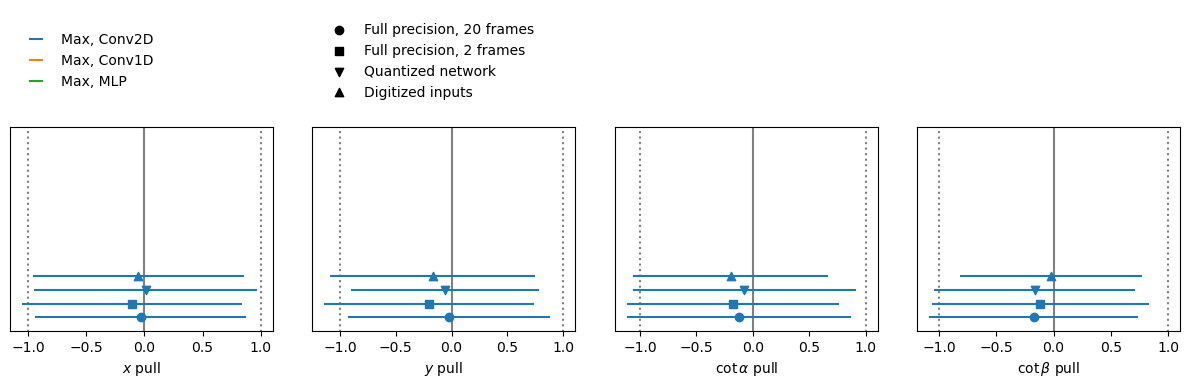

In [7]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 2]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

models_to_plot = dict((k, pulls[k]) for k in pulls.keys() if "max" in k)

names = {}
names["max_2dconv"] = "Max, Conv2D"
names["max_1dconv"] = "Max, Conv1D"
names["max_mlp"] = "Max, MLP"

format_plot(ax, len(models_to_plot.keys()))

lines = []
labels = list(models_to_plot.keys())

for i,k1 in enumerate(labels):

    if "max" not in k1:
        continue
        
    print("Model = " + k1 + "--------------")
    
    line, dots = draw_one_model(i, pulls[k1], ax)
    lines += [line]
    
ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][1].legend(dots,['Full precision, 20 frames','Full precision, 2 frames','Quantized network','Digitized inputs'],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/pulls-max.pdf")
plt.savefig("plots/pulls-max.png")

plt.show()

Model = full_2dconv--------------
Model = full_1dconv--------------
Model = full_mlp_2t--------------


/var/folders/w2/rvfyh_xs6z7d602vtxfdm0yc0000gn/T/ipykernel_30092/1328861378.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


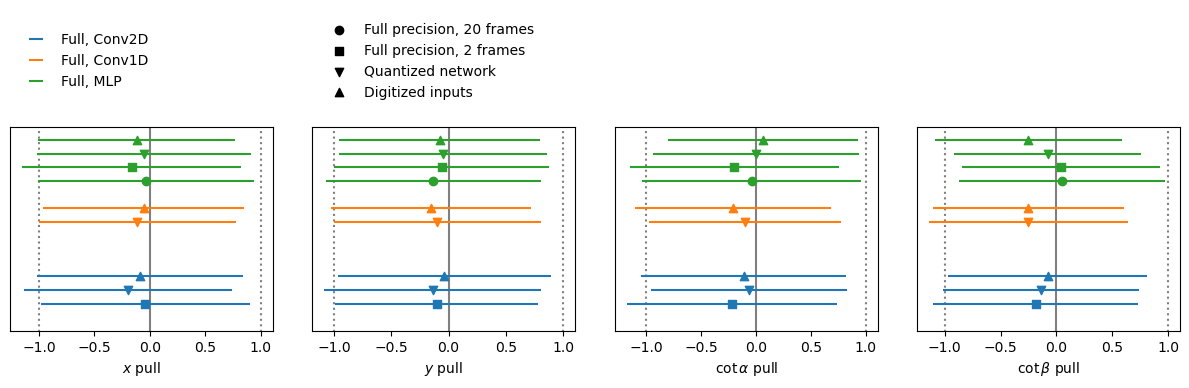

In [8]:
fig, ax = plt.subplots(2,4,figsize=(12,4),sharey=True,constrained_layout=True, gridspec_kw={'height_ratios': [1, 2]})

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')

models_to_plot = dict((k, pulls[k]) for k in pulls.keys() if "full" in k)

names = {}
names["full_2dconv"] = "Full, Conv2D"
names["full_1dconv"] = "Full, Conv1D"
names["full_mlp_2t"] = "Full, MLP"

format_plot(ax, len(models_to_plot.keys()))

lines = []
labels = list(models_to_plot.keys())

for i,k1 in enumerate(labels):

    if "full" not in k1:
        continue
        
    print("Model = " + k1 + "--------------")
    
    line, dots = draw_one_model(i, pulls[k1], ax)
    lines += [line]
    
ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[0][1].legend(dots,['Full precision, 20 frames','Full precision, 2 frames','Quantized network','Digitized inputs'],frameon=False,loc='lower left')

plt.tight_layout()

plt.savefig("plots/pulls-full.pdf")
plt.savefig("plots/pulls-full.png")

plt.show()

In [9]:
pulls.keys()

dict_keys(['max_2dconv', 'max_1dconv', 'max_mlp', 'full_2dconv', 'full_1dconv', 'full_mlp_2t'])